# OLD CAR PRICE PREDICTION
Problem Statement:

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in demand hence making them costly and some are not in demand hence cheaper. One of our clients works with small traders, who sell used cars. With the change in market due to covid 19 impact, our client is facing problems with their previous car price valuation machine learning models. So, they are looking for new machine learning models from new data. We have to make car price valuation model. This project contains two phase
• Data Collection Phase
• Model Building Phase

here we show only Model Building Phase

In [1]:
import pandas as pd
import numpy as np

In [3]:
df =pd.read_excel(r"C:\Used_CarDetails.xlsx")

In [4]:
df

,Unnamed: 0,Brand,Price,Model,KMS_driven,Fuel,Variant,Location,jaipur
0,0,2018 Mahindra Marazzo,10.15 Lakh,M8,"41,071 kms",Diesel,Manual,Ahmedabad,NaN
1,1,2016 Honda Jazz,6.28 Lakh,V CVT,"39,821 kms",Petrol,Automatic,Ahmedabad,NaN
2,2,2015 Hyundai Grand i10,4.51 Lakh,Sportz,"67,525 kms",Petrol,Manual,Ahmedabad,NaN
3,3,2016 Honda City,7.33 Lakh,i VTEC V,"25,542 kms",Petrol,Manual,Ahmedabad,NaN
4,4,2019 Jeep Compass,16.78 Lakh,1.4 Limited Plus BSIV,"32,294 kms",Petrol,Automatic,Ahmedabad,NaN
...,...,...,...,...,...,...,...,...,...
11755,555,2014 Skoda Superb,7.35 Lakh,1.8 TSI MT,"68,000 kms",Petrol,Manual,pune,NaN
11756,556,2010 Maruti A-Star,2.30 Lakh,Vxi,"53,000 kms",Petrol,Manual,pune,NaN
11757,557,2013 Maruti A-Star,2.70 Lakh,Vxi,"26,000 kms",Petrol,Manual,pune,NaN
11758,558,2019 Toyota Yaris,11.99 Lakh,V Optional CVT BSIV,"10,000 kms",Petrol,Automatic,pune,NaN


In [5]:
df.columns

Index(['Unnamed: 0', 'Brand', 'Price', 'Model', 'KMS_driven', 'Fuel',
       'Variant', 'Location', 'jaipur'],
      dtype='object')

# Exploretory Data Analysis(EDA)

In [6]:
df.shape

(11760, 9)

In [7]:
#Checking null values
df.isnull().sum()

Unnamed: 0        0
Brand             0
Price             0
Model             0
KMS_driven        0
Fuel              0
Variant           0
Location        182
jaipur        10912
dtype: int64

In [8]:
df = df.drop(['Unnamed: 0','jaipur'],axis=1)

In [9]:
df

,Brand,Price,Model,KMS_driven,Fuel,Variant,Location
0,2018 Mahindra Marazzo,10.15 Lakh,M8,"41,071 kms",Diesel,Manual,Ahmedabad
1,2016 Honda Jazz,6.28 Lakh,V CVT,"39,821 kms",Petrol,Automatic,Ahmedabad
2,2015 Hyundai Grand i10,4.51 Lakh,Sportz,"67,525 kms",Petrol,Manual,Ahmedabad
3,2016 Honda City,7.33 Lakh,i VTEC V,"25,542 kms",Petrol,Manual,Ahmedabad
4,2019 Jeep Compass,16.78 Lakh,1.4 Limited Plus BSIV,"32,294 kms",Petrol,Automatic,Ahmedabad
...,...,...,...,...,...,...,...
11755,2014 Skoda Superb,7.35 Lakh,1.8 TSI MT,"68,000 kms",Petrol,Manual,pune
11756,2010 Maruti A-Star,2.30 Lakh,Vxi,"53,000 kms",Petrol,Manual,pune
11757,2013 Maruti A-Star,2.70 Lakh,Vxi,"26,000 kms",Petrol,Manual,pune
11758,2019 Toyota Yaris,11.99 Lakh,V Optional CVT BSIV,"10,000 kms",Petrol,Automatic,pune


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Brand       11760 non-null  object
 1   Price       11760 non-null  object
 2   Model       11760 non-null  object
 3   KMS_driven  11760 non-null  object
 4   Fuel        11760 non-null  object
 5   Variant     11760 non-null  object
 6   Location    11578 non-null  object
dtypes: object(7)
memory usage: 643.2+ KB


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:>

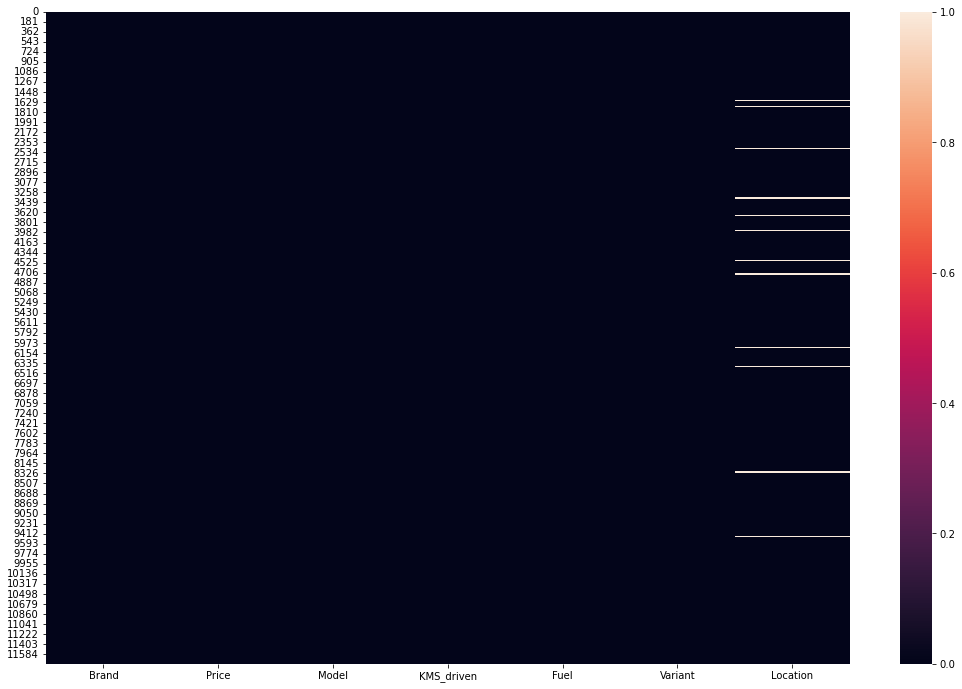

In [14]:
#Checking missing value using heatmap
plt.figure(figsize=(18,12))
sns.heatmap(df.isnull())

In [15]:
#percentage of missing values
(df.isnull().sum()/11759*100).sort_values(ascending=False)

Location      1.547751
Brand         0.000000
Price         0.000000
Model         0.000000
KMS_driven    0.000000
Fuel          0.000000
Variant       0.000000
dtype: float64

In [16]:
#Describing the Dataset
df.describe()

,Brand,Price,Model,KMS_driven,Fuel,Variant,Location
count,11760,11760,11760,11760,11760,11760,11578
unique,838,942,1100,1935,5,2,10
top,2017 Maruti Baleno,5.25 Lakh,VXI,"40,000 kms",Petrol,Manual,Mumbai
freq,156,100,404,108,7740,8732,2318


In [17]:
df.describe()

,Brand,Price,Model,KMS_driven,Fuel,Variant,Location
count,11760,11760,11760,11760,11760,11760,11578
unique,838,942,1100,1935,5,2,10
top,2017 Maruti Baleno,5.25 Lakh,VXI,"40,000 kms",Petrol,Manual,Mumbai
freq,156,100,404,108,7740,8732,2318


In [18]:
df.dtypes.index

Index(['Brand', 'Price', 'Model', 'KMS_driven', 'Fuel', 'Variant', 'Location'], dtype='object')

In [19]:
# checking for categorical columns
categorical_columns=[]
index_c=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
        index_c.append(m)
    m=m+1
print(categorical_columns)
print(index_c)

['Brand', 'Price', 'Model', 'KMS_driven', 'Fuel', 'Variant', 'Location']
[0, 1, 2, 3, 4, 5, 6]


In [20]:
# now checking for numerical columns
numerical_columns=[]
index_n=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
        index_n.append(m)
    m=m+1
print(numerical_columns)
print(index_n)

[]
[]


# Univariate Analysis Of Categorical Columns:

column Name: Brand


2017 Maruti Baleno            156
2017 Hyundai Grand i10        136
2017 Hyundai i20              124
2017 Honda City               120
2016 Maruti Baleno            108
                             ... 
2014 Nissan Micra Active        4
2018 Volkswagen Vento           4
2018 Renault Lodgy              4
2014 Mercedes-Benz E-Class      4
2016 Volkswagen GTI             4
Name: Brand, Length: 838, dtype: int64
len= 838


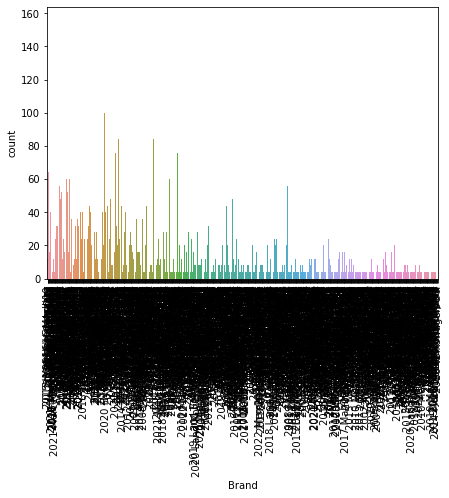



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------


column Name: Price


5.25 Lakh     100
6.25 Lakh      96
4.50 Lakh      88
8.50 Lakh      80
4.25 Lakh      80
             ... 
21.73 Lakh      4
14.43 Lakh      4
14.73 Lakh      4
7.63 Lakh       4
11.99 Lakh      4
Name: Price, Length: 942, dtype: int64
len= 942


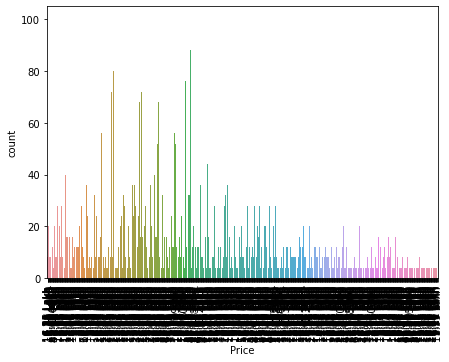



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------


column Name: Model


VXI                    404
Sportz                 192
LXI                    160
VDI                    128
VXI BS IV              124
                      ... 
GTX Plus AT D            4
1.4 Durasport EXI        4
1.5 DV5 MT Trend         4
sDrive 20D xLine         4
V Optional CVT BSIV      4
Name: Model, Length: 1100, dtype: int64
len= 1100


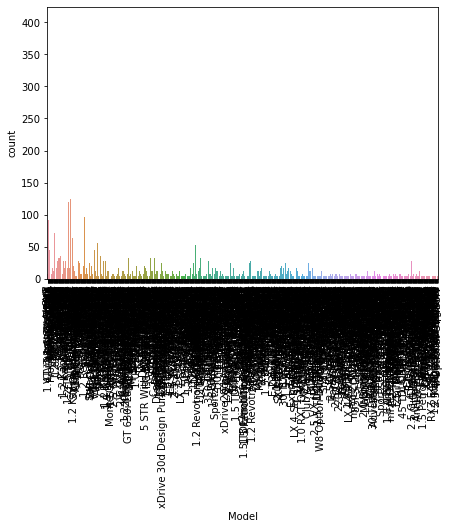



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------


column Name: KMS_driven


40,000 kms    108
50,000 kms    104
60,000 kms     92
45,000 kms     84
80,000 kms     76
             ... 
27,300 kms      4
91,796 kms      4
16,375 kms      4
65,534 kms      4
12,803 kms      4
Name: KMS_driven, Length: 1935, dtype: int64
len= 1935


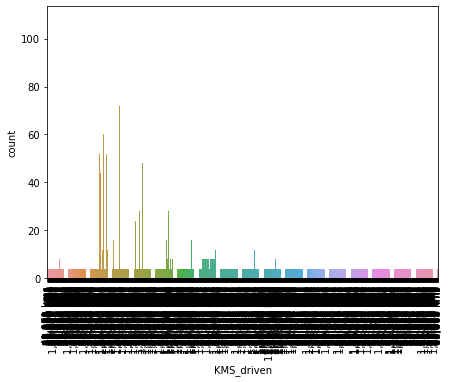



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------


column Name: Fuel


Petrol      7740
Diesel      3872
CNG          104
Electric      28
LPG           16
Name: Fuel, dtype: int64
len= 5


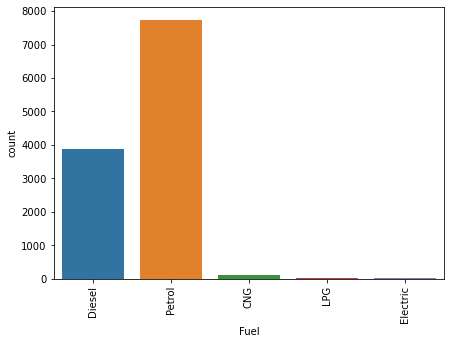



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------


column Name: Variant


Manual       8732
Automatic    3028
Name: Variant, dtype: int64
len= 2


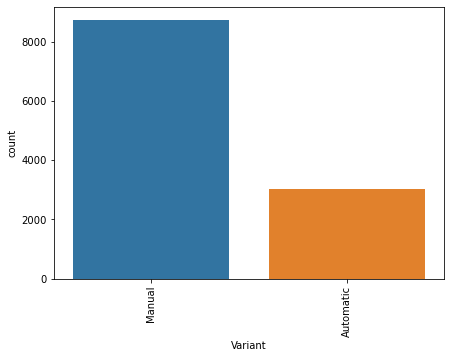



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------


column Name: Location


Mumbai       2318
Hyderabad    2293
Chennai      2175
Bangalore    2144
kolkata       848
pune          560
noida         556
Ahmedabad     320
NCR           291
jaipur         73
Name: Location, dtype: int64
len= 10


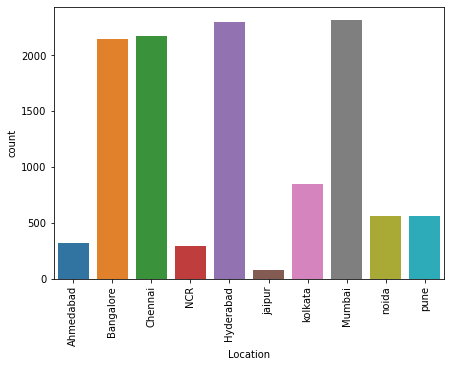



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------




In [21]:
for i in index_c:
    print("column Name:",df.columns[i])
    print("\n")
    print(df[df.columns[i]].value_counts())
    print("len=",len(df[df.columns[i]].value_counts()))
    plt.figure(figsize=(7,5))
    sns.countplot(df[df.columns[i]])
    plt.xticks(rotation=90)
    plt.show()
    print('\n')
    print("-"*125)
    print('\n')
    print("-"*125)
    print('\n')

In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Brand']=le.fit_transform(df['Brand']).astype(float)

In [26]:
df['Model']=le.fit_transform(df['Model']).astype(float)
df['Fuel']=le.fit_transform(df['Fuel']).astype(float)
df['Variant']=le.fit_transform(df['Variant']).astype(float)
df['Location']=le.fit_transform(df['Location']).astype(float)

In [27]:
df

,Brand,Price,Model,KMS_driven,Fuel,Variant,Location
0,570.0,10.15 Lakh,687.0,"41,071 kms",1.0,1.0,0.0
1,413.0,6.28 Lakh,866.0,"39,821 kms",4.0,0.0,0.0
2,350.0,4.51 Lakh,822.0,"67,525 kms",4.0,1.0,0.0
3,412.0,7.33 Lakh,1059.0,"25,542 kms",4.0,1.0,0.0
4,641.0,16.78 Lakh,135.0,"32,294 kms",4.0,0.0,0.0
...,...,...,...,...,...,...,...
11755,320.0,7.35 Lakh,262.0,"68,000 kms",4.0,1.0,9.0
11756,105.0,2.30 Lakh,939.0,"53,000 kms",4.0,1.0,9.0
11757,250.0,2.70 Lakh,939.0,"26,000 kms",4.0,1.0,9.0
11758,684.0,11.99 Lakh,870.0,"10,000 kms",4.0,0.0,9.0


In [28]:
# now checking for numerical columns
numerical_columns=[]
index_n=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
        index_n.append(m)
    m=m+1
print(numerical_columns)
print(index_n)

['Brand', 'Model', 'Fuel', 'Variant', 'Location']
[0, 2, 4, 5, 6]


column Name: Brand


505.0    156
490.0    136
493.0    124
484.0    120
429.0    108
        ... 
312.0      4
615.0      4
600.0      4
308.0      4
464.0      4
Name: Brand, Length: 838, dtype: int64
len= 838


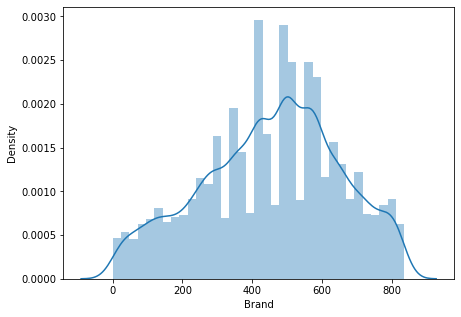



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------


column Name: Model


908.0     404
822.0     192
663.0     160
873.0     128
920.0     124
         ... 
620.0       4
124.0       4
150.0       4
1089.0      4
870.0       4
Name: Model, Length: 1100, dtype: int64
len= 1100


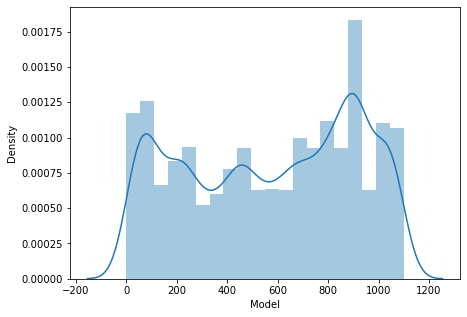



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------


column Name: Fuel


4.0    7740
1.0    3872
0.0     104
2.0      28
3.0      16
Name: Fuel, dtype: int64
len= 5


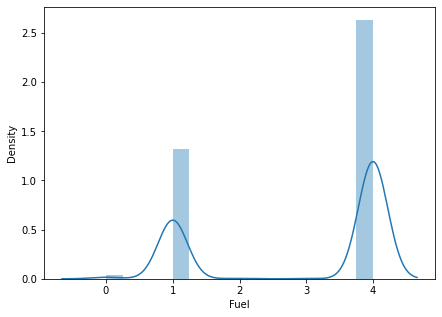



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------


column Name: Variant


1.0    8732
0.0    3028
Name: Variant, dtype: int64
len= 2


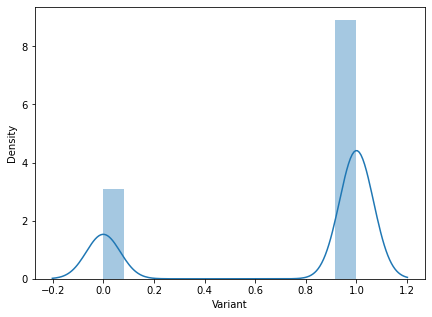



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------


column Name: Location


4.0     2318
3.0     2293
2.0     2175
1.0     2144
7.0      848
9.0      560
8.0      556
0.0      320
5.0      291
10.0     182
6.0       73
Name: Location, dtype: int64
len= 11


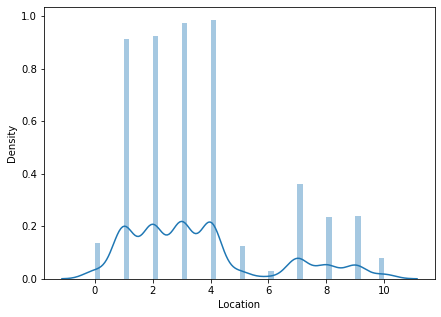



-----------------------------------------------------------------------------------------------------------------------------


-----------------------------------------------------------------------------------------------------------------------------




In [29]:
for i in index_n:
    print("column Name:",df.columns[i])
    print("\n")
    print(df[df.columns[i]].value_counts())
    print("len=",len(df[df.columns[i]].value_counts()))
    plt.figure(figsize=(7,5))
    sns.distplot(df[df.columns[i]])
    plt.show()
    print('\n')
    print("-"*125)
    print('\n')
    print("-"*125)
    print('\n')

In [30]:
df.columns

Index(['Brand', 'Price', 'Model', 'KMS_driven', 'Fuel', 'Variant', 'Location'], dtype='object')

# Bivariate Analysis:

In [ ]:
plt.figure(figsize=(10,10))
plt.suptitle('Fuel Vs Price',fontsize=20)

plt.subplot(1,2,1)
plt.title('1stFlrSF Vs SalePrice')
sns.scatterplot('KMS_driver',y='Price',data=df,color='g')

plt.subplot(1,2,2)
plt.title('2ndFlrSF Vs SalePrice')
sns.scatterplot('Model',y='Price',data=df,color='g')

(array([ 0.,  2.,  4.,  6.,  8., 10.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

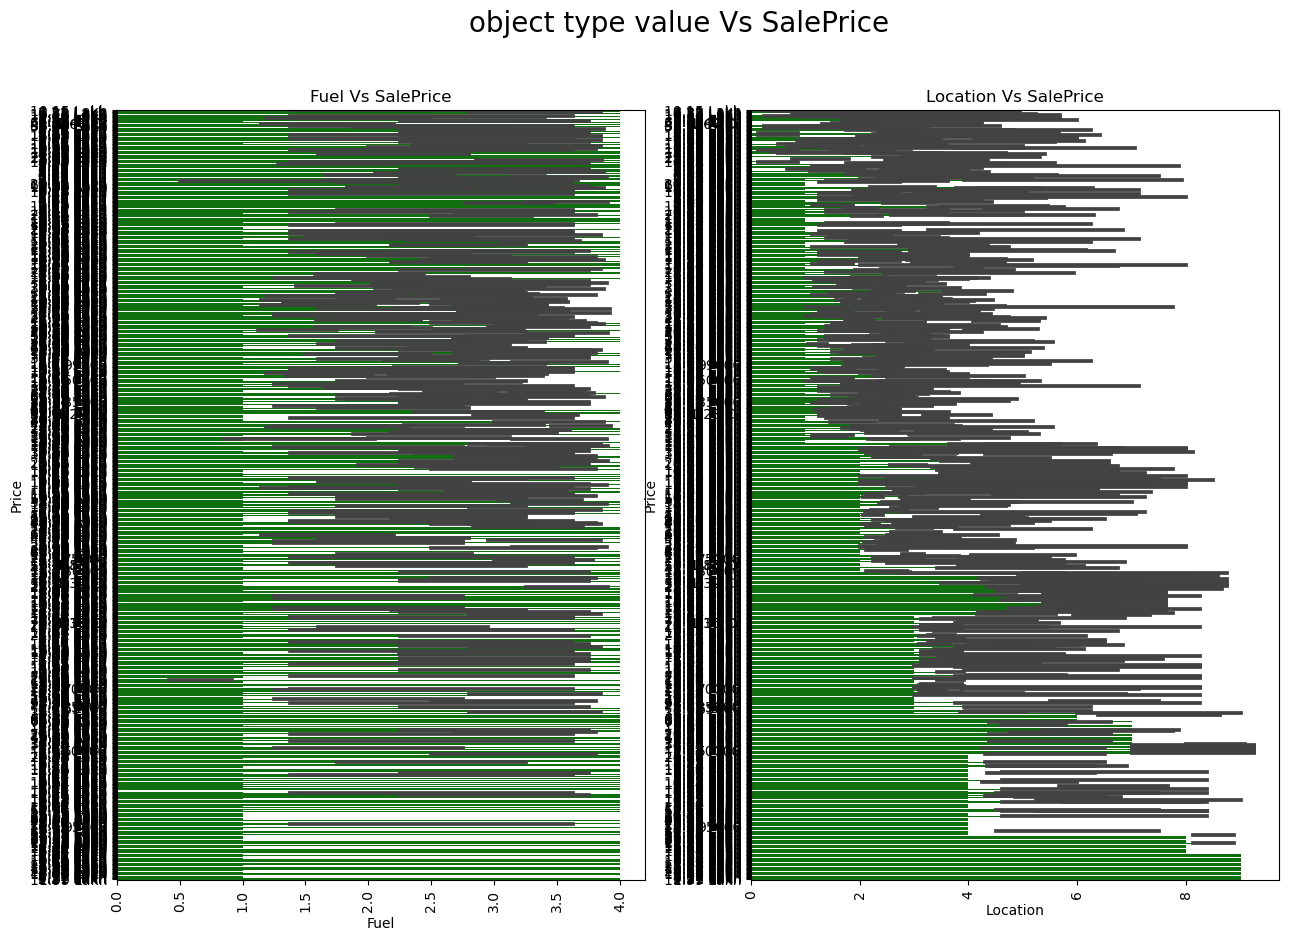

In [37]:
plt.style.use('default')
plt.figure(figsize=(15,10))

plt.suptitle('object type value Vs SalePrice',fontsize=20)
plt.subplot(1,2,1)
plt.title('Fuel Vs SalePrice')
sns.barplot(x='Fuel',y='Price',data=df,color='g')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
plt.title('Location Vs SalePrice')
sns.barplot(x='Location',y='Price',data=df,color='g')
plt.xticks(rotation=90)

# Multivariate Analysis:

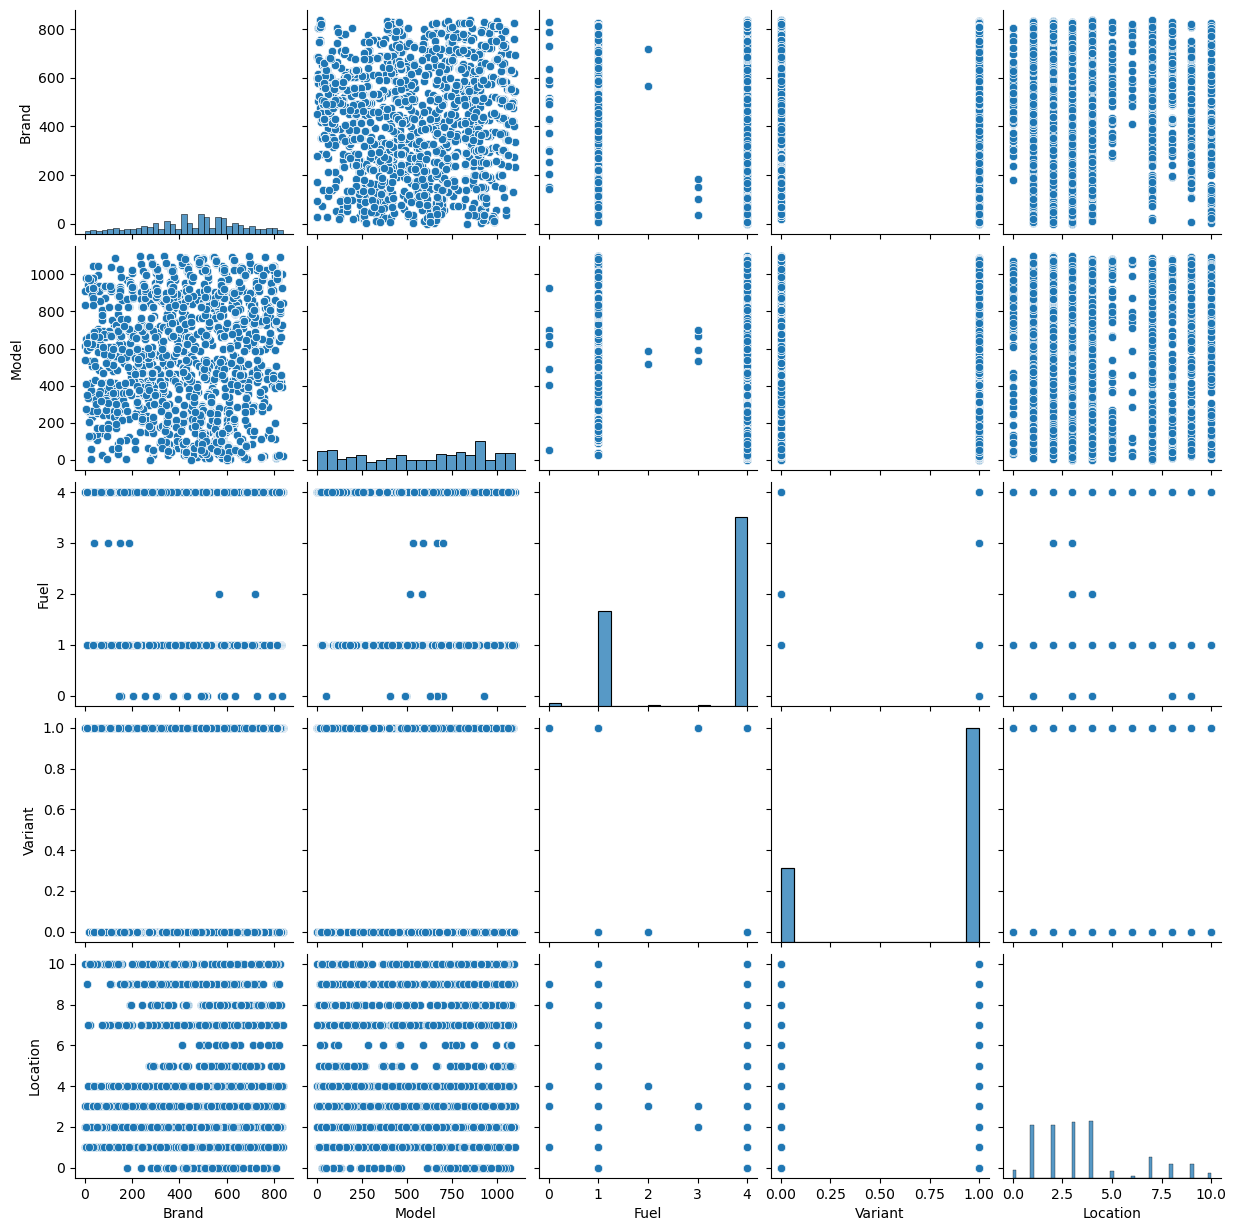

In [38]:
sns.pairplot(df)

In [40]:
#Checking Correlation
df.corr()

,Brand,Model,Fuel,Variant,Location
Brand,1.000000,0.023520,0.060975,-0.152421,0.015792
Model,0.023520,1.000000,0.026258,0.076690,-0.008351
Fuel,0.060975,0.026258,1.000000,0.056882,0.051051
Variant,-0.152421,0.076690,0.056882,1.000000,0.070831
Location,0.015792,-0.008351,0.051051,0.070831,1.000000


<AxesSubplot:>

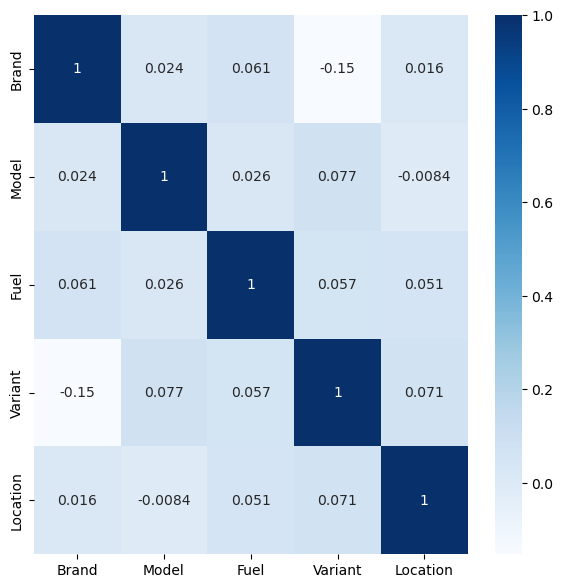

In [41]:
#checking corrleation using heatmap
plt.figure(figsize=(7,7))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [42]:
#Checking Skewness
df.skew()

Brand      -0.237870
Model      -0.172941
Fuel       -0.690750
Variant    -1.109431
Location    0.960273
dtype: float64

# Checking Outliers:

In [43]:
df[numerical_columns].nunique().to_frame('unique values')

,unique values
Brand,838
Model,1100
Fuel,5
Variant,2
Location,11


In [44]:
q=[]
for i in numerical_columns:
    if df[i].nunique()>4:
        q.append(i)

In [45]:
q

['Brand', 'Model', 'Fuel', 'Location']

In [62]:
outliers=['KMS_driven',  'Price','Variant']

In [ ]:
#Box plot of all Numerical Column
for i in outliers:
    plt.figure(figsize=(10,5))
    sns.boxplot(df[i])
    plt.show()
    print('\n')
    print("#"*127)

# Outliers handle by zscore:

In [64]:
#import zscore
from scipy.stats import zscore

In [ ]:
z=np.abs(zscore(df[outliers]))
z

# LabelEncoding:

In [67]:
# checking for categorical columns
categorical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
print(categorical_columns)

['Price', 'KMS_driven']


In [68]:
list_c=['Price', 'KMS_driven']

In [71]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list_c:
    df[i]=le.fit_transform(df[i]).astype(int)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Brand       11760 non-null  float64
 1   Price       11760 non-null  int32  
 2   Model       11760 non-null  float64
 3   KMS_driven  11760 non-null  int32  
 4   Fuel        11760 non-null  float64
 5   Variant     11760 non-null  float64
 6   Location    11760 non-null  float64
dtypes: float64(5), int32(2)
memory usage: 551.4 KB


# Dividing data in features and vectors:

In [73]:
df

,Brand,Price,Model,KMS_driven,Fuel,Variant,Location
0,570.0,35,687.0,900,1.0,1.0,0.0
1,413.0,668,866.0,865,4.0,0.0,0.0
2,350.0,480,822.0,1487,4.0,1.0,0.0
3,412.0,758,1059.0,481,4.0,1.0,0.0
4,641.0,199,135.0,663,4.0,0.0,0.0
...,...,...,...,...,...,...,...
11755,320.0,760,262.0,1494,4.0,1.0,9.0
11756,105.0,260,939.0,1207,4.0,1.0,9.0
11757,250.0,279,939.0,494,4.0,1.0,9.0
11758,684.0,104,870.0,131,4.0,0.0,9.0


In [76]:
x=df.drop("Price",axis=1) #Independent variable

y=df.iloc[:,-2] #Dependent variable

In [77]:
x

,Brand,Model,KMS_driven,Fuel,Variant,Location
0,570.0,687.0,900,1.0,1.0,0.0
1,413.0,866.0,865,4.0,0.0,0.0
2,350.0,822.0,1487,4.0,1.0,0.0
3,412.0,1059.0,481,4.0,1.0,0.0
4,641.0,135.0,663,4.0,0.0,0.0
...,...,...,...,...,...,...
11755,320.0,262.0,1494,4.0,1.0,9.0
11756,105.0,939.0,1207,4.0,1.0,9.0
11757,250.0,939.0,494,4.0,1.0,9.0
11758,684.0,870.0,131,4.0,0.0,9.0


In [78]:
y

0        1.0
1        0.0
2        1.0
3        1.0
4        0.0
        ... 
11755    1.0
11756    1.0
11757    1.0
11758    0.0
11759    0.0
Name: Variant, Length: 11760, dtype: float64

# Checking VIF score:

In [79]:
# checking for numerical columns
numerical_columns=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Brand', 'Price', 'Model', 'KMS_driven', 'Fuel', 'Variant', 'Location']


In [81]:
p=x[['Brand',  'Model', 'KMS_driven', 'Fuel', 'Variant', 'Location']]

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#define a function to calculate VIF score
def vif_clac():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(p.values,i) for i in range(p.shape[1])]
    vif["features"]=p.columns
    print(vif)

In [83]:
#checking VIF score
vif_clac()

   VIF Factor    features
0    4.400978       Brand
1    3.616268       Model
2    3.227490  KMS_driven
3    4.500526        Fuel
4    3.590383     Variant
5    2.984625    Location


# Transforming data to remove skewness:

In [84]:
#checking skewness
x.skew()

Brand        -0.237870
Model        -0.172941
KMS_driven   -0.016447
Fuel         -0.690750
Variant      -1.109431
Location      0.960273
dtype: float64

In [85]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.58966512,  0.39741464, -0.01638383, -1.38679103,  0.58887223,
        -2.41781858],
       [-0.20674545,  0.85947239, -0.07651581,  0.7196132 , -1.69816126,
        -2.41781858],
       [-0.52575607,  0.74831242,  0.91110651,  0.7196132 ,  0.58887223,
        -2.41781858],
       ...,
       [-1.03124555,  1.04083798, -0.76737144,  0.7196132 ,  0.58887223,
         1.76938039],
       [ 1.16896497,  0.86950681, -1.6302572 ,  0.7196132 , -1.69816126,
         1.76938039],
       [ 0.05175809, -0.87021723,  0.37134474,  0.7196132 , -1.69816126,
         1.76938039]])

In [87]:
#print skewness after power transform
df_new1=pd.DataFrame(x,columns=df.drop("Price",axis=1).columns)
df_new1.skew()

Brand        -0.229965
Model        -0.377695
KMS_driven   -0.308675
Fuel         -0.674078
Variant      -1.109431
Location     -0.006151
dtype: float64

now plotting a distribution plots

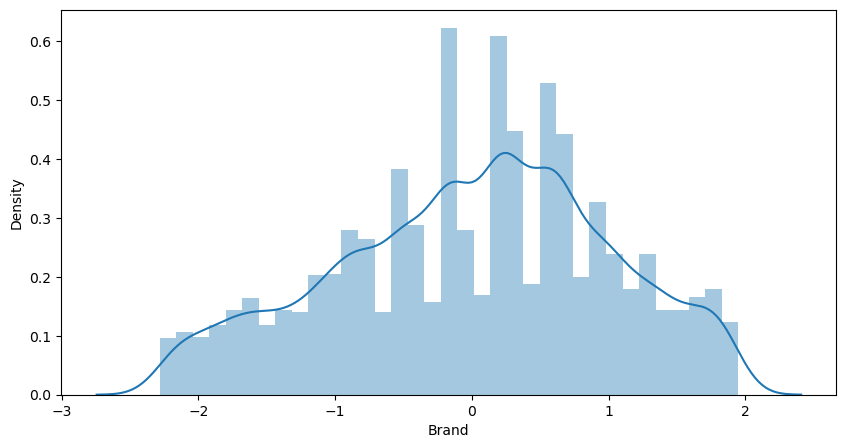

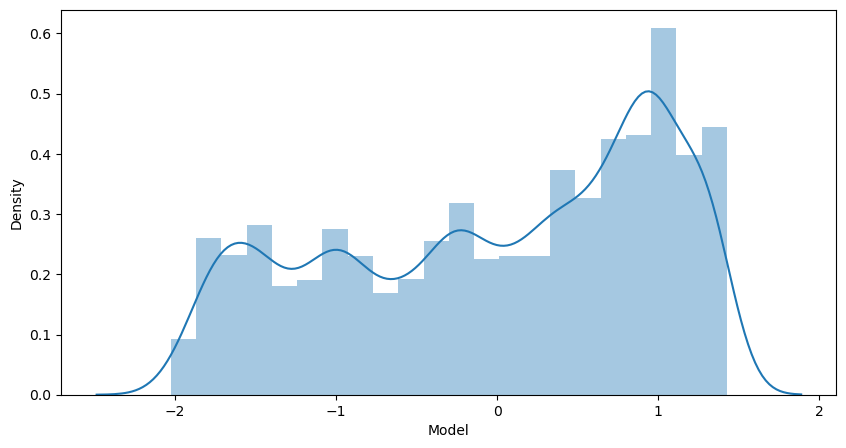

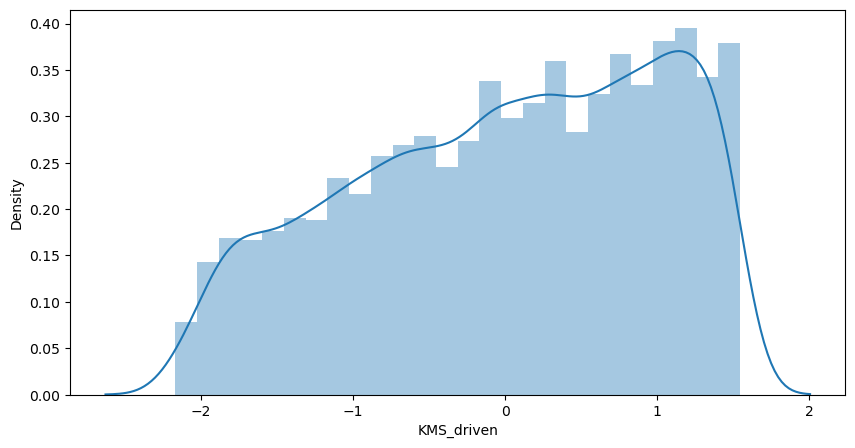

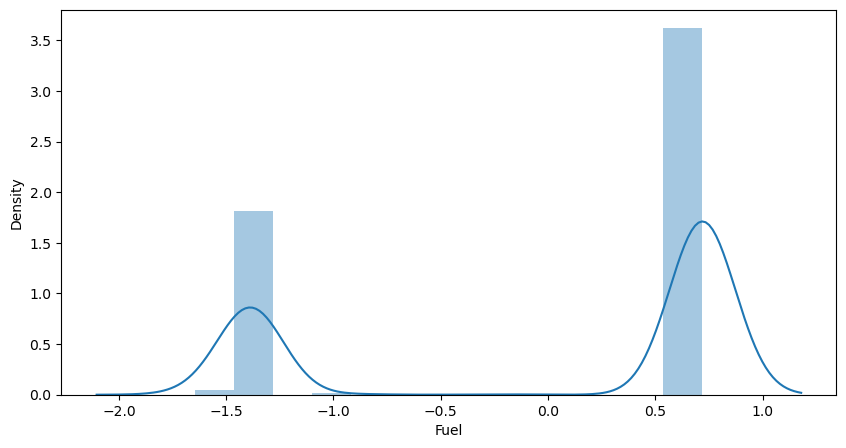

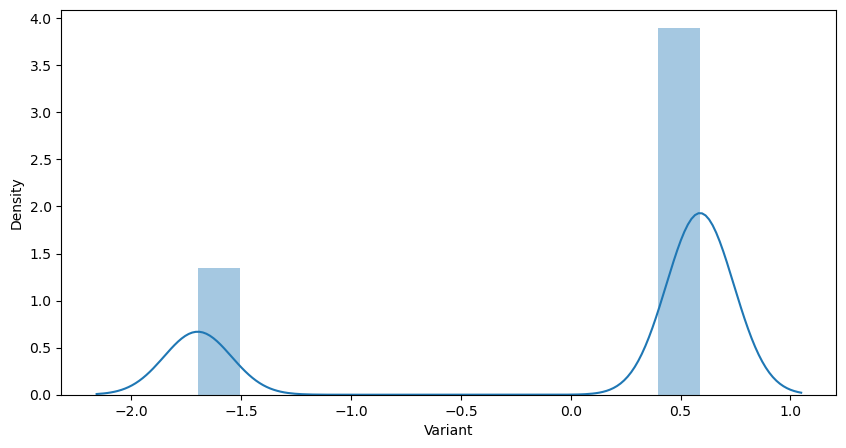

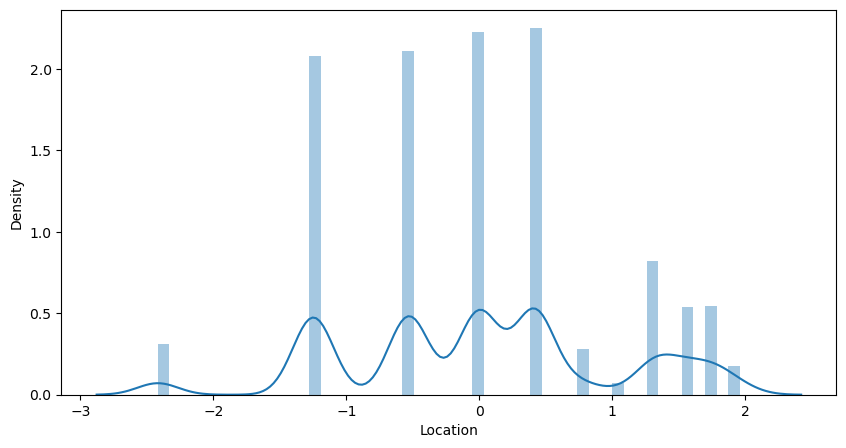

In [90]:
for i in range(6):
    plt.figure(figsize=(10,5))
    sns.distplot(df_new1[df_new1.columns[i]])    
    plt.show()

In [91]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.58966512,  0.39741464, -0.01638383, -1.38679103,  0.58887223,
        -2.41781858],
       [-0.20674545,  0.85947239, -0.07651581,  0.7196132 , -1.69816126,
        -2.41781858],
       [-0.52575607,  0.74831242,  0.91110651,  0.7196132 ,  0.58887223,
        -2.41781858],
       ...,
       [-1.03124555,  1.04083798, -0.76737144,  0.7196132 ,  0.58887223,
         1.76938039],
       [ 1.16896497,  0.86950681, -1.6302572 ,  0.7196132 , -1.69816126,
         1.76938039],
       [ 0.05175809, -0.87021723,  0.37134474,  0.7196132 , -1.69816126,
         1.76938039]])

Now our Data is Ready for Model Building

# Model Building:

In [92]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

In [93]:
x.shape

(11760, 6)

In [94]:
lm=LinearRegression()
m=0
for i in range (0,5000):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.30,random_state=i)
    lm.fit(train_x,train_y)
    p=lm.score(train_x,train_y)
    if p>m:
        m=p
        n=i
print('lm.score=',m,'at random state=',n)

lm.score= 1.0 at random state= 0


In [95]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.30,random_state=0)

In [96]:
#cheking shape of all variable
print("train_x shape =",train_x.shape)
print("test_x shape =",test_x.shape)
print("train_y shape =",train_y.shape)
print("test_y shape =",test_y.shape)

train_x shape = (8232, 6)
test_x shape = (3528, 6)
train_y shape = (8232,)
test_y shape = (3528,)


In [97]:
lm=LinearRegression()
lm.fit(train_x,train_y)
lm.score(train_x,train_y)

1.0

In [98]:
lm.coef_

array([-4.08512746e-16,  3.17978965e-16, -4.31763708e-16,  3.17735188e-16,
        4.37247643e-01,  1.48386157e-16])

In [99]:
lm.intercept_

0.742517006802721

# Error of Llinear regression Model on our dataset

In [100]:
print('ERROR:')
from sklearn.metrics import mean_absolute_error,mean_squared_error
predlm=lm.predict(test_x)
print('Mean Absolute Error: ',mean_absolute_error(test_y,predlm))
print('Mean Squared Error: ',mean_squared_error(test_y,predlm))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(test_y,predlm)))

ERROR:
Mean Absolute Error:  5.977833496536132e-16
Mean Squared Error:  5.23776082363076e-31
Root Mean Squared Error:  7.237237610878035e-16


In [102]:
#checking r2 score
from sklearn.metrics import r2_score
print(r2_score(test_y,predlm))

1.0


In [103]:
#cross validation of the model
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lm,x,y,cv=5)
print("cross validation score of Linear Regression is =",scr.mean())

cross validation score of Linear Regression is = 1.0


In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [105]:
LR_model= LinearRegression()
RD_model= Ridge()
LS_model= Lasso()
DT_model= DecisionTreeRegressor()
SV_model= SVR()
KNR_model= KNeighborsRegressor()
RFR_model= RandomForestRegressor()
XGB_model= XGBRegressor()
Elastic_model= ElasticNet()
SGH_model= SGDRegressor()
Bag_model=BaggingRegressor()
ADA_model=AdaBoostRegressor()
GB_model= GradientBoostingRegressor()

In [106]:
model=[LR_model,RD_model,LS_model,DT_model,SV_model,KNR_model,RFR_model,XGB_model,Elastic_model,SGH_model,Bag_model,ADA_model,GB_model]


In [107]:
for i in model:
    p=i
    p.fit(train_x,train_y)
    print("accuracy score of",i,"is =",p.score(train_x,train_y))
    
    print("\n")
    print("#"*50)

accuracy score of LinearRegression() is = 1.0


##################################################
accuracy score of Ridge() is = 0.9999999845531231


##################################################
accuracy score of Lasso() is = 0.0


##################################################
accuracy score of DecisionTreeRegressor() is = 1.0


##################################################
accuracy score of SVR() is = 0.9890562785577789


##################################################
accuracy score of KNeighborsRegressor() is = 1.0


##################################################
accuracy score of RandomForestRegressor() is = 1.0


##################################################
accuracy score of XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
 

# Checking Cross Val Score:

In [108]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    print("For CV =",i)
    for m in model:
        scr=cross_val_score(m,x,y,cv=i)
        print("cross validation score of",m,"is =",scr.mean())
    print('*'*100)

For CV = 2
cross validation score of LinearRegression() is = 1.0
cross validation score of Ridge() is = 0.9999999685815224
cross validation score of Lasso() is = -0.004178475879552002
cross validation score of DecisionTreeRegressor() is = 1.0
cross validation score of SVR() is = 0.9271291345587767
cross validation score of KNeighborsRegressor() is = 1.0
cross validation score of RandomForestRegressor() is = 1.0
cross validation score of XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimator

# Parameter Tuning:RandomForestRegressor

In [109]:
#creating parameter list to pass in GreadSearchCV
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[3,4,5,6,7,8]}
gcv1=GridSearchCV(RandomForestRegressor(),parameters,cv=8,scoring='accuracy')
gcv1.fit(train_x,train_y)
gcv1.best_params_

{'max_depth': 3, 'max_features': 'auto'}

In [110]:
gcv1.best_estimator_

RandomForestRegressor(max_depth=3, max_features='auto')

In [111]:
gcv1.best_estimator_.fit(test_x,test_y)
print("Test Accuracy=",gcv1.best_estimator_.score(test_x,test_y))

Test Accuracy= 1.0


# Parameter Tuning:GradientBoostingRegressor

In [112]:
#creating parameter list to pass in GreadSearchCV
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[3,4,5,6,7,8],'learning_rate':[1,0.1,0.001,0.0001]}
gcv1=GridSearchCV(GradientBoostingRegressor(),parameters,cv=3,scoring='accuracy')
gcv1.fit(train_x,train_y)
gcv1.best_params_

{'learning_rate': 1, 'max_depth': 3, 'max_features': 'auto'}

In [113]:
gcv1.best_estimator_

GradientBoostingRegressor(learning_rate=1, max_features='auto')

In [114]:
gcv1.best_estimator_.fit(test_x,test_y)
print("Test Accuracy=",gcv1.best_estimator_.score(test_x,test_y))

Test Accuracy= 1.0


# Creating Final Model:

In [115]:
final_model=GradientBoostingRegressor(learning_rate=1, max_features='auto')

In [116]:
final_model.fit(test_x,test_y)
pred=final_model.predict(test_x)
print("Test Accuracy=",final_model.score(test_x,test_y))

Test Accuracy= 1.0


In [117]:
final_model.fit(train_x,train_y)
pred1=final_model.predict(train_x)
print("Train Accuracy=",final_model.score(train_x,train_y))

Train Accuracy= 1.0


In [118]:
print('ERROR:')
from sklearn.metrics import mean_absolute_error,mean_squared_error
predlm=final_model.predict(test_x)
print('Mean Absolute Error: ',mean_absolute_error(test_y,predlm))
print('Mean Squared Error: ',mean_squared_error(test_y,predlm))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(test_y,predlm)))

ERROR:
Mean Absolute Error:  6.499282679177003e-17
Mean Squared Error:  1.0398457070168092e-31
Root Mean Squared Error:  3.224663869330894e-16


,Predicted,Original
3048,1.000000e+00,1.0
10414,-5.118261e-15,0.0
6113,1.000000e+00,1.0
4347,-5.118261e-15,0.0
6698,-5.118261e-15,0.0
...,...,...
1768,1.000000e+00,1.0
719,-5.118261e-15,0.0
5218,-5.118261e-15,0.0
2507,1.000000e+00,1.0


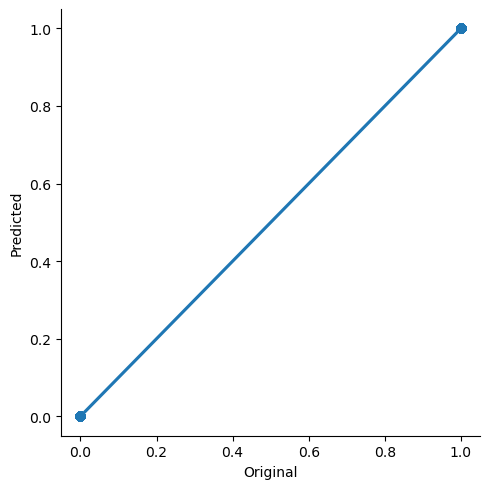

In [119]:
MLdf= pd.DataFrame({'Original':test_y, 'Predicted':pred},columns=["Predicted","Original"])
sns.lmplot(x='Original',y='Predicted',data=MLdf,palette='rainbow')
MLdf

In [120]:
#Save the final model                                                                      
import joblib 
joblib.dump(final_model,'Old Car price prediction Model.pkl')
 

['Old Car price prediction Model.pkl']